In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('british-airways.csv')

In [3]:
df.head()

,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity
0,"""Will honestly never fly them again if I can h...",4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,True,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,3.0,2.0,NaN,4.0,2,NaN,False,NaN
1,"""Very unprofessional for a renowned airline li...",1,19/11/2022,This is the worst experience I have ever had w...,True,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1.0,1.0,"<span class=""star fill"">1</span>",1.0,1,NaN,False,1.0
2,"""lounge was overcrowded and worn out""",2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,4.0,2.0,"<span class=""star fill"">4</span>",1.0,1,NaN,False,NaN
3,"""very uncomfortable trip""",1,07/11/2022,Not Verified | Worst experience ever. Outbound...,False,NaN,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,2.0,5.0,"<span class=""star fill"">2</span>",2.0,1,NaN,False,2.0
4,"""rate this just as a mediocre journey""",5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,1.0,3.0,"<span class=""star fill"">1</span>",2.0,3,NaN,True,NaN


In [4]:
df.isnull().sum()

title                       0
rating                      0
review_date                 0
review                      0
trip_verified               0
aircraft                  480
type_of_traveller           1
seat_type                   0
route                       2
date_flown                  0
seat_comfort               76
cabin_staff_service        83
food_and_beverages        530
ground_service             53
value_for_money             0
wifi_and_connecticity    1200
recommend                   0
wifi_and_connectivity     913
dtype: int64

In [5]:
df['title']

0       "Will honestly never fly them again if I can h...
1       "Very unprofessional for a renowned airline li...
2                   "lounge was overcrowded and worn out"
3                               "very uncomfortable trip"
4                  "rate this just as a mediocre journey"
                              ...                        
1195                "nice flight with good cabin service"
1196                     "they are just an embarrassment"
1197                             "very good flight again"
1198                           "expensive at £343 return"
1199                      "staff were extremely friendly"
Name: title, Length: 1200, dtype: object

In [7]:
! pip install spacy

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0


In [8]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [9]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [10]:
df['removed']=df['title'].apply(remove_special_characters)

In [11]:
df['removed']

0       Will honestly never fly them again if I can he...
1       Very unprofessional for a renowned airline lik...
2                     lounge was overcrowded and worn out
3                                 very uncomfortable trip
4                    rate this just as a mediocre journey
                              ...                        
1195                  nice flight with good cabin service
1196                       they are just an embarrassment
1197                               very good flight again
1198                              expensive at 343 return
1199                        staff were extremely friendly
Name: removed, Length: 1200, dtype: object

# Text Lemmetization

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
# stemming

In [21]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [24]:
df['lemm']=df['removed'].apply(simple_stemmer)

In [25]:
# to remove stopword

In [26]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [27]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [29]:
df['after stop']=df['lemm'].apply(remove_stopwords)

In [30]:
# sentiment analysis

In [32]:
! pip install afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=fbe291c8cfd2bfcf1e2c64c316a7be9c35e55770d84b53e63125d0a56bac680d
  Stored in directory: c:\users\ashwin\appdata\local\pip\cache\wheels\79\91\ee\8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [33]:
from afinn import Afinn

In [34]:
af=Afinn()

In [35]:
df['sentiment_score']=[af.score(x) for x in df['after stop']]

In [36]:
df['sentiment_score']

0       2.0
1       2.0
2      -1.0
3       0.0
4       0.0
       ... 
1195    6.0
1196   -2.0
1197    3.0
1198    0.0
1199    0.0
Name: sentiment_score, Length: 1200, dtype: float64

In [39]:
df['sentiment_score']=df['sentiment_score'].astype('int')

In [51]:
def sco(x):
    l=[]
    for i in x:
        if i<0:
            l.append('negative')
        elif i>0:
            l.append('positive')
        else:
            l.append('neutral')
    return l

In [54]:
df['cat_sent']=sco(df['sentiment_score'])

In [55]:
df['cat_sent'].value_counts()

neutral     659
positive    286
negative    255
Name: cat_sent, dtype: int64

In [56]:
df.head()

,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,...,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity,removed,lemm,after stop,sentiment_score,cat_sent
0,"""Will honestly never fly them again if I can h...",4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,True,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,...,4.0,2,NaN,False,NaN,Will honestly never fly them again if I can he...,will honestli never fli them again if i can he...,honestli never fli help,2,positive
1,"""Very unprofessional for a renowned airline li...",1,19/11/2022,This is the worst experience I have ever had w...,True,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,...,1.0,1,NaN,False,1.0,Very unprofessional for a renowned airline lik...,veri unprofession for a renown airlin like ba,veri unprofession renown airlin like ba,2,positive
2,"""lounge was overcrowded and worn out""",2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,...,1.0,1,NaN,False,NaN,lounge was overcrowded and worn out,loung wa overcrowd and worn out,loung wa overcrowd worn,-1,negative
3,"""very uncomfortable trip""",1,07/11/2022,Not Verified | Worst experience ever. Outbound...,False,NaN,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,...,2.0,1,NaN,False,2.0,very uncomfortable trip,veri uncomfort trip,veri uncomfort trip,0,neutral
4,"""rate this just as a mediocre journey""",5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,...,2.0,3,NaN,True,NaN,rate this just as a mediocre journey,rate thi just as a mediocr journey,rate thi mediocr journey,0,neutral


In [57]:
import seaborn as sns

<AxesSubplot:xlabel='cat_sent', ylabel='rating'>

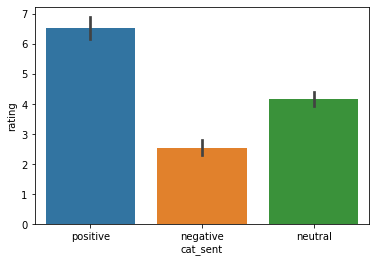

In [58]:
sns.barplot(x=df['cat_sent'],y=df['rating'])

* It is clear from the data the customer who has given high review has given positive reviews.


* The customers who gave less ratings are the customers that gave negative feedback

<AxesSubplot:xlabel='trip_verified'>

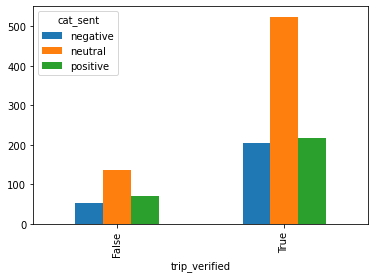

In [60]:
pd.crosstab(df['trip_verified'],df['cat_sent']).plot(kind='bar')

In [62]:
df['seat_type'].value_counts()

Economy Class      651
Business Class     394
Premium Economy    102
First Class         53
Name: seat_type, dtype: int64

<AxesSubplot:xlabel='cat_sent'>

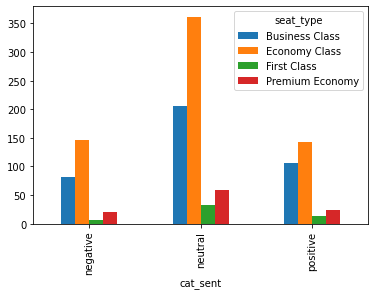

In [63]:
pd.crosstab(df['cat_sent'],df['seat_type']).plot(kind='bar')

* The business class and economy class people both have high neutral reviews.


* Economy class people gave high negative reviews


* Since the customer travelling in economy is high they are high in all the category


* Apart from economy class customers business class customers also gave high negative reviews